<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analysis-of-RNA-Puzzle-round-23-data" data-toc-modified-id="Analysis-of-RNA-Puzzle-round-23-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analysis of RNA Puzzle round 23 data</a></span></li><li><span><a href="#Read-and-process-fingerprints" data-toc-modified-id="Read-and-process-fingerprints-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read and process fingerprints</a></span></li><li><span><a href="#Dictionaries-and-definitions" data-toc-modified-id="Dictionaries-and-definitions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dictionaries and definitions</a></span></li><li><span><a href="#Plot-things" data-toc-modified-id="Plot-things-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot things</a></span><ul class="toc-item"><li><span><a href="#add-colors" data-toc-modified-id="add-colors-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>add colors</a></span></li><li><span><a href="#Draw!" data-toc-modified-id="Draw!-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Draw!</a></span></li></ul></li><li><span><a href="#Similarity-matrix" data-toc-modified-id="Similarity-matrix-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Similarity matrix</a></span><ul class="toc-item"><li><span><a href="#RMSD-vs-Tanimoto" data-toc-modified-id="RMSD-vs-Tanimoto-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>RMSD vs Tanimoto</a></span></li></ul></li><li><span><a href="#Docking-experiments" data-toc-modified-id="Docking-experiments-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Docking experiments</a></span><ul class="toc-item"><li><span><a href="#redocking" data-toc-modified-id="redocking-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>redocking</a></span></li><li><span><a href="#Combo-do-papieru" data-toc-modified-id="Combo-do-papieru-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Combo do papieru</a></span><ul class="toc-item"><li><span><a href="#Fingerprints" data-toc-modified-id="Fingerprints-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Fingerprints</a></span></li></ul></li></ul></li><li><span><a href="#Similarity-Heatmaps" data-toc-modified-id="Similarity-Heatmaps-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Similarity Heatmaps</a></span></li></ul></div>

# Analysis of RNA Puzzle round 23 data

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

from scipy.stats import linregress

sns.set(font_scale=2, style="ticks", rc={"axes.titlesize":24,"axes.labelsize":20, 'xtick.labelsize': 20, 'ytick.labelsize': 20})

# Read and process fingerprints

In [20]:
df_pz = {}

#dictionary of dataframes

# read data from: 
# calculated for the full length ligand molecule (as template)

df_pz['fulllength'] = {}

df_pz['fulllength']['simple'] = pd.read_csv("puzzle/fingerprints/fulllength-puzzle-SIMPLE.tsv", delimiter="\t", index_col=0) #.drop_duplicates()
df_pz['fulllength']['pbs']    = pd.read_csv("puzzle/fingerprints/fulllength-puzzle-PBS.tsv", delimiter="\t", index_col=0) #.drop_duplicates()
df_pz['fulllength']['full']   = pd.read_csv("puzzle/fingerprints/fulllength-puzzle-FULL.tsv", delimiter="\t", index_col=0) #.drop_duplicates()

# only for the war-head part

df_pz['warhead'] = {}

df_pz['warhead']['simple'] = pd.read_csv("puzzle/fingerprints/warhead-puzzle-SIMPLE.tsv", delimiter="\t", index_col=0) #.drop_duplicates()
df_pz['warhead']['pbs']    = pd.read_csv("puzzle/fingerprints/warhead-puzzle-PBS.tsv", delimiter="\t", index_col=0) #.drop_duplicates()
df_pz['warhead']['full']   = pd.read_csv("puzzle/fingerprints/warhead-puzzle-FULL.tsv", delimiter="\t", index_col=0) #.drop_duplicates()

In [21]:
def dropZeros(df):
    return df.loc[:, (df != 0).any(axis=0)].dropna(axis=1, how='all')

In [22]:
dicLevel1 = ['fulllength', 'warhead']
dicLevel2 = ['simple', 'pbs', 'full']

In [23]:
# non zero version of dataframes
df_pzNz = {}

for k1 in dicLevel1:
    df_pzNz[k1] = {}
    for k2 in dicLevel2:
        df_pzNz[k1][k2] = dropZeros(df_pz[k1][k2])

# Dictionaries and definitions

In [24]:
interactionsDict = {}
# interactionsDict['full'] = [ 'no interaction', 'HB', 'CA', 'Pi_Cation', 'Lipophilic', 'Pi_Stacking', 'Pi_Anion']
interactionsDict['pbs'] = [ 'no interaction', 'P', 'B', 'S']
interactionsDict['simple'] = [ 'no interaction', 'SIMPLE']



paletteDict = {}
# paletteDict['full'] = [ 'white', [0, 0.5, 1.0], "red", [0.5, 1.0, 0.0], [0.5, 0.5, 0.5], 'orange', 'deeppink']
paletteDict['pbs'] = [ 'white', 'red', 'green', [0, 0.5, 1.0]]
paletteDict['simple'] = [ 'white', 'gray']


# ---------- taken from the pymol plugin ------------#
interactionColors = {}
interactionColors['no interaction'] = "white"
interactionColors['HB'] = [0, 0.5, 1.0] # "marine"
interactionColors['CA'] = "red"
interactionColors['HAL'] = "purple"
interactionColors['Lipophilic'] = "silver"
interactionColors['Pi_Stacking'] = "orange"
interactionColors['Pi_Cation'] = "lime" # "green"
interactionColors['Pi_Anion'] = "hotpink"
interactionColors['Water-mediated'] = "blue"
interactionColors['Ion-mediated'] = "salmon"
# ----------------------------------------------------#

interactionsDict['full'] = []
paletteDict['full'] = []

i=0
for key, value in interactionColors.items():
    interactionsDict['full'].extend([key])
    paletteDict['full'].extend([value])
    print(i, key, value)
    i+=1
    
# print(interactionsDict)
# print(paletteDict)    
# ----------------------------------------------------#


interactionDesc = {}
interactionDesc['full'] = {}
interactionDesc['full']['Pi_Stacking'] = "Pi-stacking"
interactionDesc['full']['Pi_Cation'] = "Pi-cation"
interactionDesc['full']['HB'] = "Hydrogen bond"
interactionDesc['full']['CA'] = "Cation-anion"
interactionDesc['full']['Pi_Anion'] = "Pi-anion"
interactionDesc['full']['HAL'] = "Halogen bond"
interactionDesc['full']['Lipophilic'] = "Lipophilic"
interactionDesc['full']['Water-mediated'] = "Water-mediated"
interactionDesc['full']['Ion-mediated'] = "Ion-mediated"

interactionDesc['pbs'] = {}
interactionDesc['pbs']['P'] = "phosphate"
interactionDesc['pbs']['B'] = "base"
interactionDesc['pbs']['S'] = "shugar"

0 no interaction white
1 HB [0, 0.5, 1.0]
2 CA red
3 HAL purple
4 Lipophilic silver
5 Pi_Stacking orange
6 Pi_Cation lime
7 Pi_Anion hotpink
8 Water-mediated blue
9 Ion-mediated salmon


# Plot things

## add colors

In [25]:
def addColorsToValues(df, fptype):
    
    interactions = interactionsDict[fptype]
    
    for i, interaction in enumerate(interactions):
        selectedCols = [col for col in df.columns if interaction in col]
        df = df.apply(lambda x: x * i if x.name in selectedCols else x)

    return df

def replaceColumnNames(df, dictionary):
    for key, value in dictionary.items():
        df.columns = [x.replace(key, value, 1) for x in df.columns ]
    
    return df


def getUniqueValues(df):
    uniqueValues = []
    for col in df:
        uniqueValues.extend(df[col].unique())

    return list(set(uniqueValues))

In [26]:
# add colors to dfs
df_pzNzColors = {}

for k1 in dicLevel1:
    df_pzNzColors[k1] = {}
    for fptype in dicLevel2:
        df_pzNzColors[k1][fptype] = addColorsToValues(df_pzNz[k1][fptype], fptype)

## Draw!

In [27]:
def drawLegend(fptype):
    interactions = interactionsDict[fptype]

    dfColors = pd.DataFrame(np.array( [range(0, len(interactions))]  ),
                      columns=interactions)

    # print(dfColors)
    drawFingerprint(dfColors, fptype, figsize=(3, 0.75), yfontsize=0, xfontsize=18, axSize=0)
    plt.savefig("puzzle23-legend-%s.png" % (fptype), dpi=600, bbox_inches="tight")

# ---------------- #

def drawLegendSelected(df, fptype, filename):
    interactions = interactionsDict[fptype]
    uniqueValues = getUniqueValues(df)
    columns = [interactions[x] for x in uniqueValues]

    dfColors = pd.DataFrame(np.array( [uniqueValues]), columns=columns)
    print(dfColors)

    # print(dfColors)
    drawFingerprint(dfColors, fptype, figsize=(3, 0.75), yfontsize=0, xfontsize=18, axSize=0)
    plt.savefig(filename, dpi=600, bbox_inches="tight")

In [28]:
def drawFingerprint(df, fptype, figsize=(12, 7), filename='', xfontsize=8, yfontsize=18, axSize=18):

    if fptype == 'simple':
        df.columns = [x.replace("#SIMPLE", "") for x in df.columns ]
        xlabel = 'residue'
    elif fptype == 'pbs':
        df.columns = [x.replace("#", " ") for x in df.columns ]
        df = replaceColumnNames(df, interactionDesc[fptype])
        xlabel='residue, interacting fragment'
    elif fptype == 'full':
        df.columns = [x.replace("#", " ") for x in df.columns ]
        df = replaceColumnNames(df, interactionDesc[fptype])
        xlabel='residue, interaction type'
    
    
    fig, ax = plt.subplots(figsize=figsize)
    palette = paletteDict[fptype]


    ax = sns.heatmap(df.drop(columns=["Ligand_name", "origin"], errors='ignore'),
                     linewidths=0.5,
                     linecolor='darkslategray',
                     vmin=0, vmax=len(palette),
                     cmap=palette,
                     xticklabels=1,
                     yticklabels='auto',
                     cbar=False)
    
#     ax.set(ylabel=, xlabel=)
    ax.set_xlabel(xlabel, fontsize=axSize)
    ax.set_ylabel('Model', fontsize=axSize)


    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=90,
                       fontweight='light',
                       fontsize=xfontsize, fontfamily='monospace')
    
    ax.set_yticklabels(ax.get_yticklabels(),
                       rotation=0,
                       fontweight='light',
                       fontsize=yfontsize)
    
    if(xfontsize == 0):
        ax.set_xticks([])
        ax.set_xticklabels([])
    if(yfontsize == 0):
        ax.set_yticks([])
        ax.set_yticklabels([])

#     ax.axhline(len(df)-1, color='grey', linewidth=0.8)
#     ax.axhline(1, color='grey', linewidth=0.96)
    #     ax.axhline(20, color='grey', linewidth=0.8)

    if filename != '':
        print("We are saving to file %s" % (filename))
        plt.savefig(filename, dpi=600, bbox_inches="tight")


************* fulllength
************* warhead


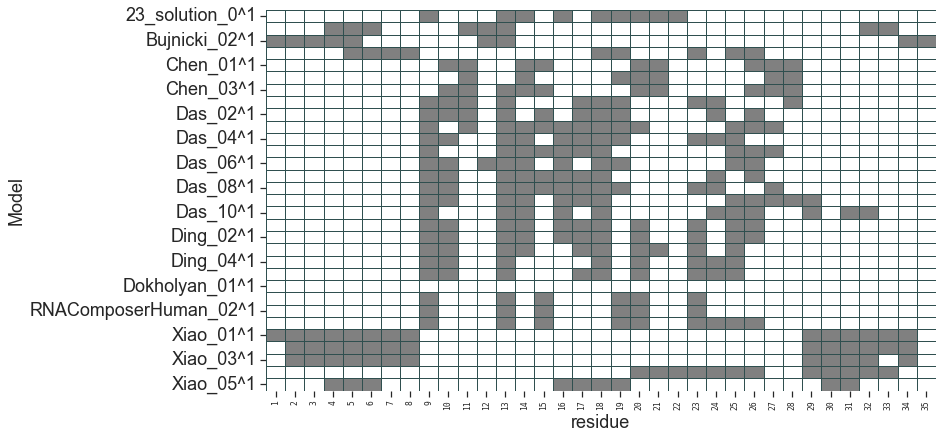

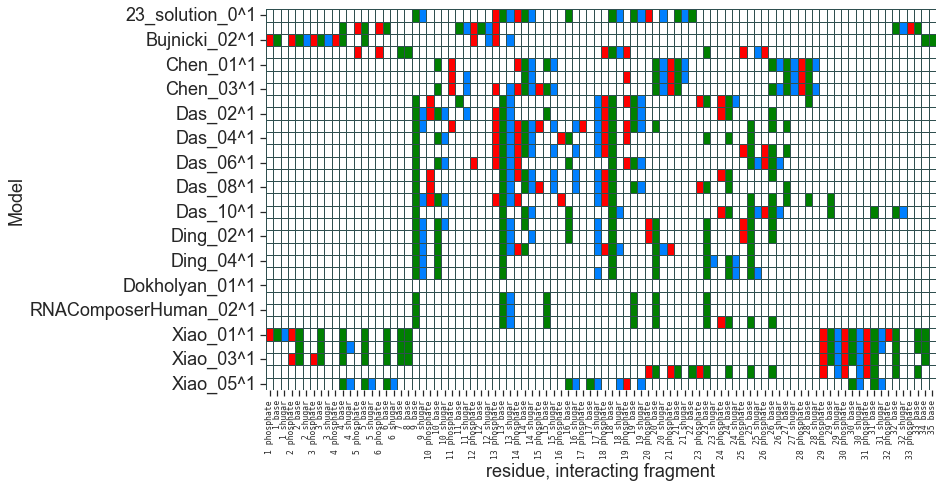

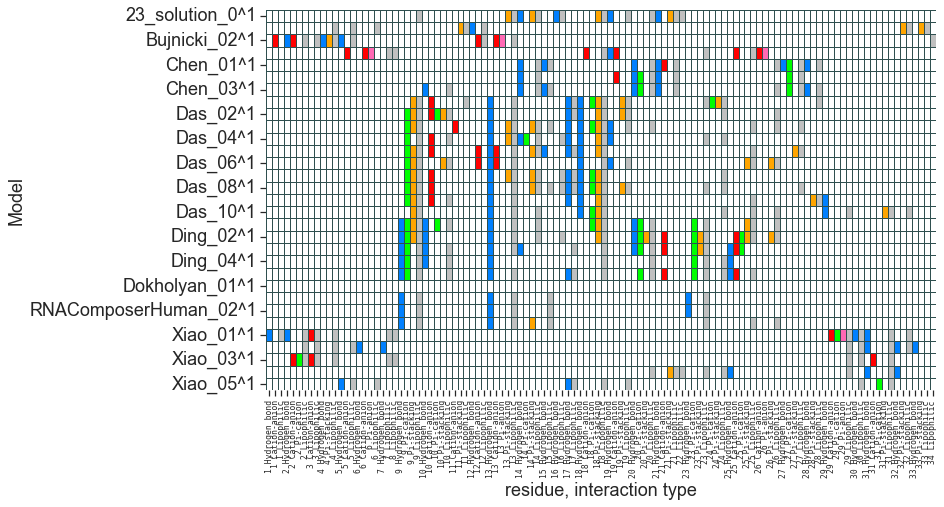

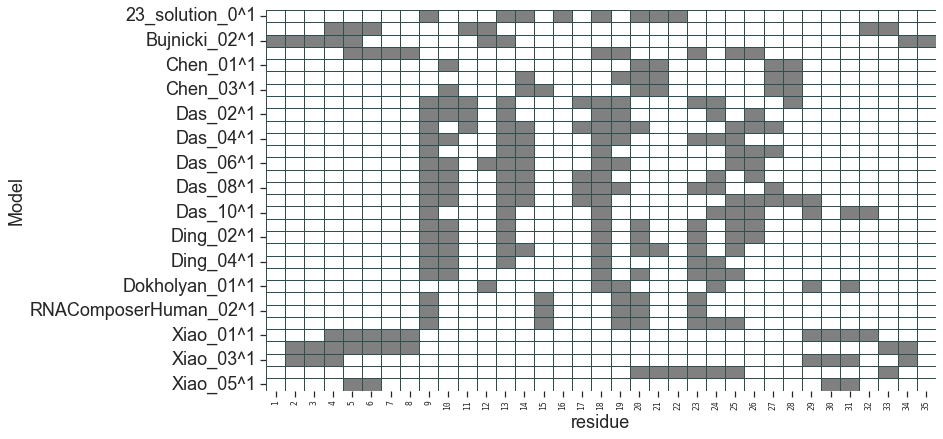

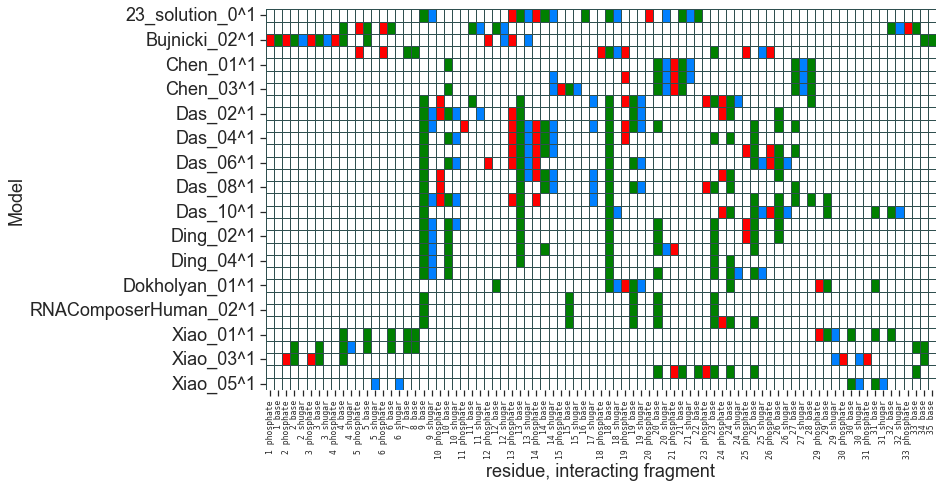

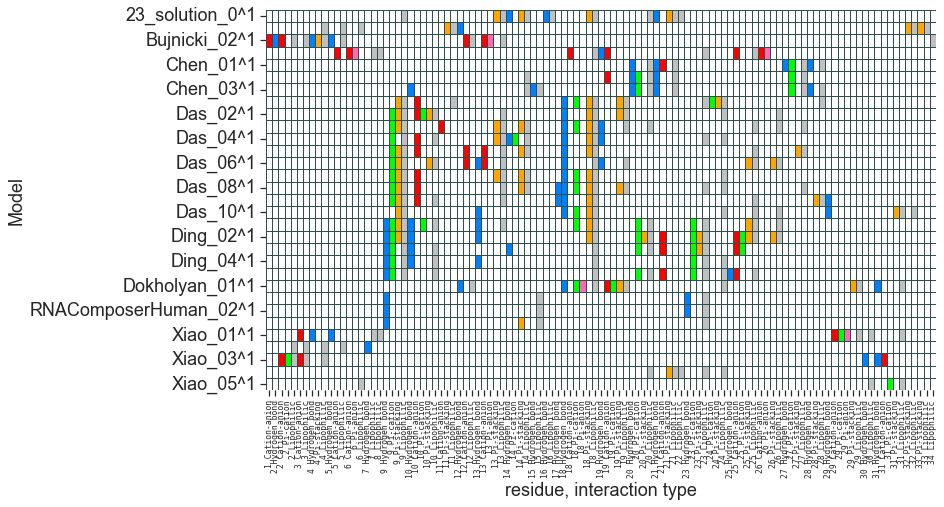

In [29]:
# draw all fingerprints
for k1 in dicLevel1:
    print("*************", k1)
    for fptype in dicLevel2:
        drawFingerprint(df_pzNzColors[k1][fptype], fptype)

In [30]:
# with duplicates removed
# drawFingerprint(df_pz_fullNzColors.drop_duplicates(subset=df_pz_fullNzColors.columns))

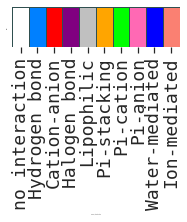

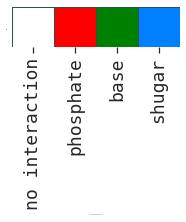

In [31]:
drawLegend('full')
drawLegend('pbs')

# Similarity matrix

## RMSD vs Tanimoto

- merged in libre office, as a lot of manual analysis was required

In [32]:
df_pz_predictions = pd.read_csv("puzzle/ligrmsd+similarity.csv", delimiter=",", index_col=0)

df_pz_predictions = df_pz_predictions.dropna()
df_pz_predictions#.head(5)

,RMSD RNA,DI all,INF all,"RMSD Ligand (flexible,full_molecule)","Percent of ref match(flexible,full_molecule)","Percent of molecule match(flexible,full_molecule)","RMSD Ligand (strict,full_molecule)","Percent of ref match(strict,full_molecule)","Percent of molecule match(strict,full_molecule)","RMSD Ligand (flexible,warhead)",...,warhead|PBS|tanimoto,warhead|PBS|tversky,warhead|SIMPLE|cosine_similarity,warhead|SIMPLE|euclidean,warhead|SIMPLE|half_square_euclidean,warhead|SIMPLE|manhattan,warhead|SIMPLE|soergel,warhead|SIMPLE|square_euclidean,warhead|SIMPLE|tanimoto,warhead|SIMPLE|tversky
Molecule,,,,,,,,,,,,,,,,,,,,,
23_solution_0,0.000,0.000,1.000,0.00,100.00,100.0,0.00,100.00,100.00,0.00,...,1.0000,1.0000,1.0000,0.0100,0.0001,0.0001,0.0001,0.0001,1.0000,1.0000
Bujnicki_01,12.157,386.744,0.031,27.83,100.00,100.0,27.84,100.00,100.00,17.01,...,0.0001,0.0001,0.0001,3.8730,7.5000,15.0000,1.0000,15.0000,0.0001,0.0001
Bujnicki_02,12.165,175.018,0.070,36.59,100.00,100.0,39.81,80.77,80.77,20.61,...,0.0645,0.1250,0.1179,3.8730,7.5000,15.0000,0.9375,15.0000,0.0625,0.1250
Bujnicki_03,11.952,353.330,0.034,20.47,100.00,100.0,20.46,100.00,100.00,12.48,...,0.0769,0.1250,0.1179,3.8730,7.5000,15.0000,0.9375,15.0000,0.0625,0.1250
Chen_01,11.422,24.688,0.463,15.33,100.00,100.0,17.55,61.54,61.54,10.34,...,0.1364,0.1875,0.3162,3.0000,4.5000,9.0000,0.8182,9.0000,0.1818,0.2500
Chen_02,13.021,22.253,0.585,15.02,100.00,100.0,18.15,61.54,61.54,7.24,...,0.1818,0.2500,0.4330,2.8284,4.0000,8.0000,0.7273,8.0000,0.2727,0.3750
Chen_03,10.587,18.749,0.565,15.57,100.00,100.0,18.78,61.54,61.54,7.92,...,0.1200,0.1875,0.4009,3.0000,4.5000,9.0000,0.7500,9.0000,0.2500,0.3750
Das_01,11.162,22.566,0.495,9.68,55.77,100.0,9.68,55.77,100.00,9.09,...,0.1071,0.1875,0.3354,3.4641,6.0000,12.0000,0.8000,12.0000,0.2000,0.3750
Das_02,12.834,20.642,0.622,7.34,55.77,100.0,7.34,55.77,100.00,7.42,...,0.2000,0.3125,0.3750,3.1623,5.0000,10.0000,0.7692,10.0000,0.2308,0.3750


[-0.0317959   0.51041968]
R-squared: 0.367750


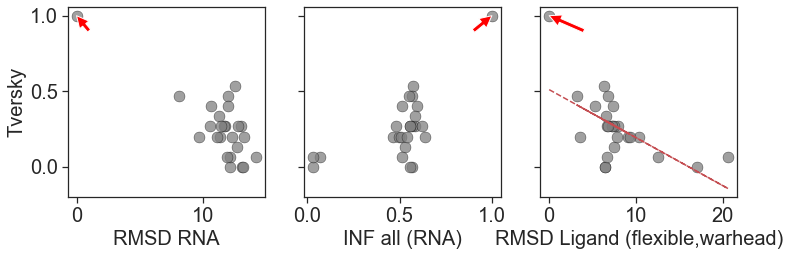

In [33]:
size = 120

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(12, 3.5))
# fig.suptitle('Bigger 1 row x 2 columns axes with no data')


def rysujScatter(x, y, ax):
    g = sns.scatterplot(
        data=df_pz_predictions,
        x=x,
        y=y,
#         hue='Ligand_name',
        legend=False,
        ax=ax,
        color="gray",
        alpha=0.75,
        edgecolor="black",  # for edge color
        linewidth=0.4,  # line width of spot
        s=size,
    )
#     g.set(xscale="symlog")


def drawArrow(ax, x, y, dx, dy):
    ax.annotate("",
                xy=(x, y),
                xytext=(x + dx, y + dy),
                arrowprops=dict(facecolor='red'))


# yAxis="Tanimoto(FULL)"
# yAxis="Tanimoto(PBS)"
# yAxis="Manhattan(FULL)" 


yAxis="warhead|FULL|tversky"
    
rysujScatter(x="RMSD RNA", y=yAxis, ax=axes[0])
drawArrow(axes[0], 0, 1, 1, -0.1)

rysujScatter(x="INF all", y=yAxis, ax=axes[1])
drawArrow(axes[1], 1, 1, -0.1, -0.1)
axes[1].set_xlabel('INF all (RNA)')

rysujScatter(x="RMSD Ligand (flexible,warhead)", y=yAxis, ax=axes[2])
drawArrow(axes[2],  0, 1, 4, -0.1)


axes[0].set_ylabel('Tversky')


# linear regression

x=df_pz_predictions["RMSD Ligand (flexible,warhead)"].to_numpy()
y=df_pz_predictions[yAxis].to_numpy()


coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)

axes[2].plot(x, poly1d_fn(x), '--r');

print(coef)

# slope, intercept, r_value, p_value, std_err 
res = linregress(x, y)

# print(slope, intercept, r_value, p_value, std_err)
print(f"R-squared: {res.rvalue**2:.6f}")


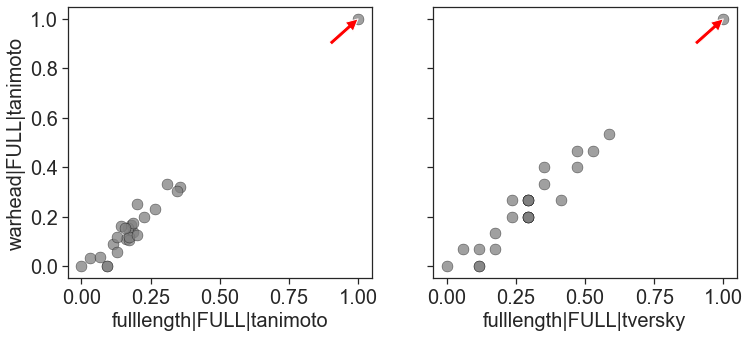

In [34]:
# similarity of models to the template, for comparison of warhead vs full molecule

fig, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 5))
rysujScatter(x="fulllength|FULL|tanimoto", y="warhead|FULL|tanimoto", ax=axes[0])
drawArrow(axes[0], 1, 1, -0.1, -0.1)

rysujScatter(x="fulllength|FULL|tversky", y="warhead|FULL|tversky", ax=axes[1])
drawArrow(axes[1],  1, 1, -0.1, -0.1)

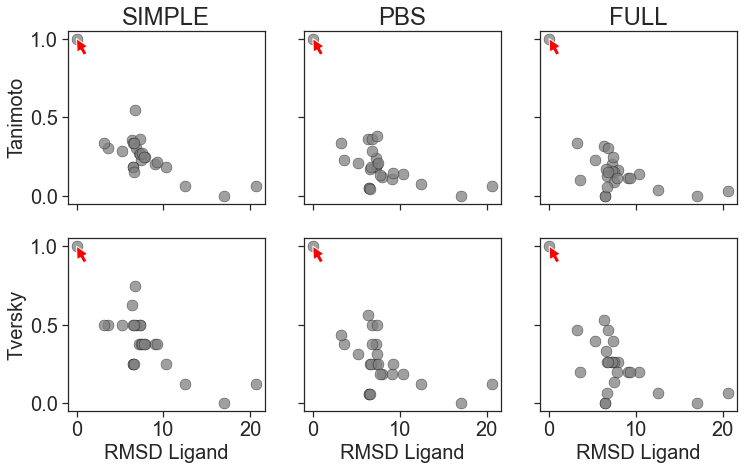

In [35]:
# SIMPLE, PBS and FULL

size = 120

fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 7))


xAxis="RMSD Ligand (flexible,warhead)"

rysujScatter(x=xAxis, y="warhead|SIMPLE|tanimoto", ax=axes[0,0])
drawArrow(axes[0,0], 0, 1, 1, -0.1)


rysujScatter(x=xAxis, y="warhead|PBS|tanimoto", ax=axes[0,1])
drawArrow(axes[0,1], 0, 1, 1, -0.1)

rysujScatter(x=xAxis, y="warhead|FULL|tanimoto", ax=axes[0,2])
drawArrow(axes[0,2], 0, 1, 1, -0.1)



rysujScatter(x=xAxis, y="warhead|SIMPLE|tversky", ax=axes[1,0])
drawArrow(axes[1,0], 0, 1, 1, -0.1)


rysujScatter(x=xAxis, y="warhead|PBS|tversky", ax=axes[1,1])
drawArrow(axes[1,1], 0, 1, 1, -0.1)

rysujScatter(x=xAxis, y="warhead|FULL|tversky", ax=axes[1,2])
drawArrow(axes[1,2], 0, 1, 1, -0.1)



axes[0,0].set_ylabel('Tanimoto')
axes[1,0].set_ylabel('Tversky')

axes[1,0].set_xlabel('RMSD Ligand')
axes[1,1].set_xlabel('RMSD Ligand')
axes[1,2].set_xlabel('RMSD Ligand')

axes[0,0].set_title('SIMPLE')
axes[0,1].set_title('PBS')
axes[0,2].set_title('FULL')

plt.subplots_adjust(wspace=0.2)

# Docking experiments
## redocking

Two programs were used: RLDock, rDock

In [36]:
# bez jonów i wody
# dockingFile = "docking/solution-full-rmsd+fp-similarity.csv"

# z jonami
dockingFile = "docking/rmsd+similarity-RNA+ions.tsv"

df_pz_redocking = pd.read_csv(dockingFile, delimiter="\t", index_col=2) #.drop_duplicates()

df_pz_redocking

,POSE,RMSD Ligand,Cosine similarity,Euclidean,Half square euclidean,Manhattan,Soergel,Square euclidean,Tanimoto,Tversky
Ligand_name,,,,,,,,,,
23_solution_0^1,1,0.00,1.0000,0.0100,0.0001,0.0001,0.0001,0.0001,1.0000,1.0000
HZD^1,2,25.06,0.0001,5.0990,13.0000,26.0000,1.0000,26.0000,0.0001,0.0001
HZD^2,3,21.33,0.0001,5.4772,15.0000,30.0000,1.0000,30.0000,0.0001,0.0001
HZD^3,4,23.72,0.0001,5.1962,13.5000,27.0000,1.0000,27.0000,0.0001,0.0001
HZD^4,5,24.82,0.0001,4.8990,12.0000,24.0000,1.0000,24.0000,0.0001,0.0001
...,...,...,...,...,...,...,...,...,...,...
HZD^396,397,25.13,0.0001,5.5678,15.5000,31.0000,1.0000,31.0000,0.0001,0.0001
HZD^397,398,22.99,0.0001,5.0000,12.5000,25.0000,1.0000,25.0000,0.0001,0.0001
HZD^398,399,20.46,0.0001,5.1962,13.5000,27.0000,1.0000,27.0000,0.0001,0.0001


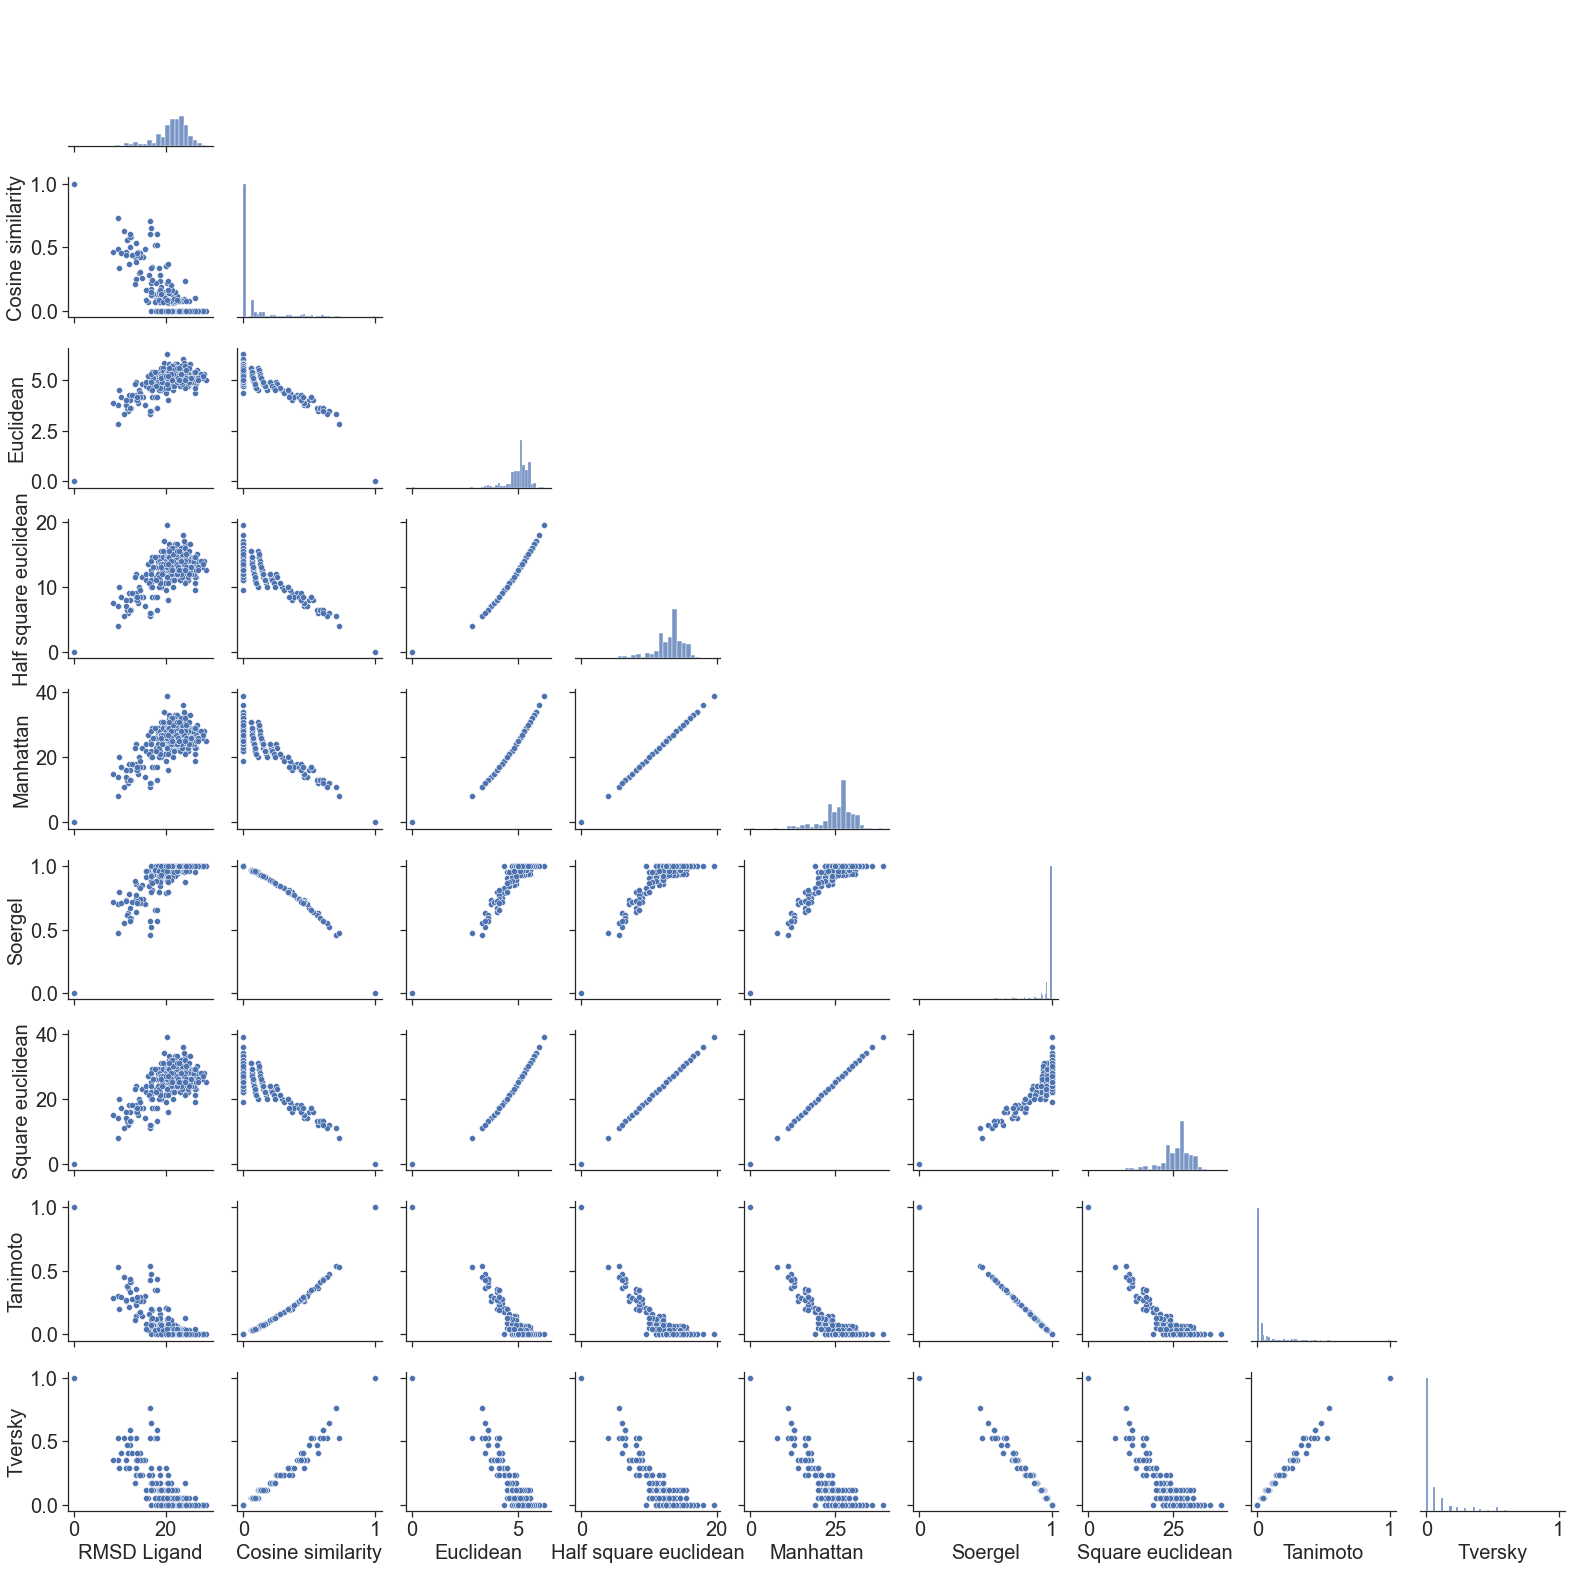

In [37]:
g = sns.PairGrid(df_pz_redocking.drop('POSE', axis=1), corner=True)
g.map_lower(sns.scatterplot);
g.map_diag(sns.histplot);

[-0.02862953  0.6758857 ]
R-squared: 0.596385


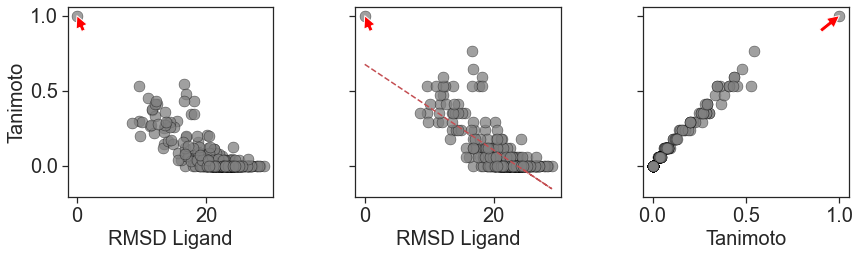

In [38]:
size = 120

fig, axes = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(14, 3.5))
# fig.suptitle('Bigger 1 row x 2 columns axes with no data')


def rysujScatter2(df, x, y, ax, symlog=False):
    g = sns.scatterplot(
        data=df,
        x=x,
        y=y,
        legend=False,
        alpha=0.75,
        ax=ax,
        color="gray",
        edgecolor="black",  # for edge color
        linewidth=0.4,  # line width of spot
        s=size,
    )
    if symlog== True:
        g.set(xscale="symlog")


def drawArrow(ax, x, y, dx, dy):
    ax.annotate("",
                xy=(x, y),
                xytext=(x + dx, y + dy), alpha=0.5,
                arrowprops=dict(facecolor='red'))


rysujScatter2(df_pz_redocking, x="RMSD Ligand", y="Tanimoto", ax=axes[0], symlog=False)
drawArrow(axes[0], 0, 1, 1, -0.1)


rysujScatter2(df_pz_redocking, x="RMSD Ligand", y="Tversky", ax=axes[1], symlog=False)
drawArrow(axes[1],  0, 1, 1, -0.1)

rysujScatter2(df_pz_redocking, x="Tanimoto", y="Tversky", ax=axes[2], symlog=False)
drawArrow(axes[2],  1, 1, -0.1, -0.1)

plt.subplots_adjust(wspace=0.4)



# linear regression

x=df_pz_redocking["RMSD Ligand"].to_numpy()
y=df_pz_redocking["Tversky"].to_numpy()


coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)

axes[1].plot(x, poly1d_fn(x), '--r');

print(coef)

# slope, intercept, r_value, p_value, std_err 
res = linregress(x, y)

# print(slope, intercept, r_value, p_value, std_err)
print(f"R-squared: {res.rvalue**2:.6f}")

## Combo do papieru

In [39]:
def linregplot(x, y, ax):

    
    coef = np.polyfit(x,y,1)
    poly1d_fn = np.poly1d(coef)

    
    sortedX = np.sort(x)
    ax.plot(sortedX, poly1d_fn(sortedX), ls='--', color='salmon');

    print(coef)

    # slope, intercept, r_value, p_value, std_err 
    res = linregress(x, y)

    # print(slope, intercept, r_value, p_value, std_err)
    print(f"R-squared: {res.rvalue**2:.6f}")


[-0.06218459  0.97150153]
R-squared: 0.609628
[ 0.71273776 -0.1001731 ]
R-squared: 0.443762
[-0.0317959   0.51041968]
R-squared: 0.367750
[-0.02862953  0.6758857 ]
R-squared: 0.596385


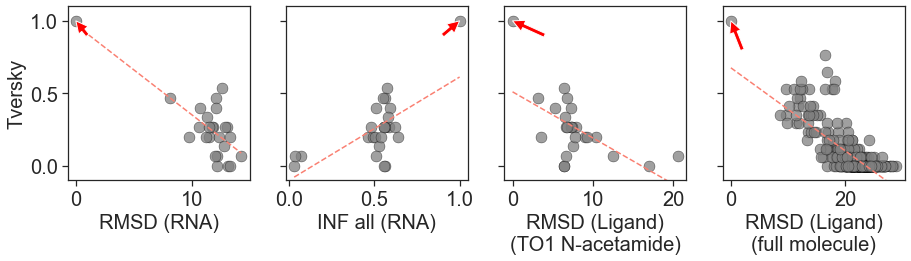

In [40]:
size = 120

fig, axes = plt.subplots(1, 4, sharey=True, figsize=(15, 3.2))


yAxis="warhead|FULL|tversky"
    
rysujScatter(x="RMSD RNA", y=yAxis, ax=axes[0])
drawArrow(axes[0], 0, 1, 1, -0.1)
axes[0].set_xlabel('RMSD (RNA)')

rysujScatter(x="INF all", y=yAxis, ax=axes[1])
drawArrow(axes[1], 1, 1, -0.1, -0.1)
axes[1].set_xlabel('INF all (RNA)')

rysujScatter(x="RMSD Ligand (flexible,warhead)", y=yAxis, ax=axes[2])
drawArrow(axes[2],  0, 1, 4, -0.1)
axes[2].set_xlabel('RMSD (Ligand)\n(TO1 N-acetamide)')


rysujScatter2(df_pz_redocking, x="RMSD Ligand", y="Tversky", ax=axes[3], symlog=False)
drawArrow(axes[3],  0, 1, 2, -0.2)
axes[3].set_xlabel('RMSD (Ligand)\n(full molecule)')


axes[0].set_ylabel('Tversky')
axes[0].set_ylim(-0.1, 1.1)


# axes[0].set_title('A.', loc='left')
# axes[1].set_title('B.', loc='left')
# axes[2].set_title('C.', loc='left')
# axes[3].set_title('D. Redocking', loc='left')



# -------- linear regression -------- 

x=df_pz_predictions["RMSD RNA"].to_numpy()
y=df_pz_predictions[yAxis].to_numpy()
linregplot(x, y, axes[0])

x=df_pz_predictions["INF all"].to_numpy()
y=df_pz_predictions[yAxis].to_numpy()
linregplot(x, y, axes[1])


x=df_pz_predictions["RMSD Ligand (flexible,warhead)"].to_numpy()
y=df_pz_predictions[yAxis].to_numpy()
linregplot(x, y, axes[2])

x=df_pz_redocking['RMSD Ligand'].to_numpy()
y=df_pz_redocking['Tversky'].to_numpy()
linregplot(x, y, axes[3])

plt.savefig("puzzle23-scatterplots.png", dpi=600, bbox_inches="tight")



### Fingerprints

In [43]:
df_pz_redockingFP = pd.read_csv("docking/case_study/rna.pdb_all+ref.sdf_FULL.tsv", delimiter="\t", index_col=0) #.drop_duplicates()

df_pz_redockingFPNZ = dropZeros(df_pz_redockingFP)

df_pz_redockingFPNZColors = addColorsToValues(df_pz_redockingFPNZ, 'full')

df_pz_redockingFPNZColors.head(2)

,1#Pi_Cation,1#Pi_Stacking,1#Lipophilic,2#HB,2#CA,2#Pi_Cation,2#Pi_Anion,2#Lipophilic,3#HB,3#CA,...,31#Pi_Stacking,31#Lipophilic,32#HB,32#CA,32#Pi_Anion,32#Pi_Stacking,32#Lipophilic,33#HB,33#Lipophilic,34#HB
Ligand_name,,,,,,,,,,,,,,,,,,,,,
23_solution_0^1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HZD^1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


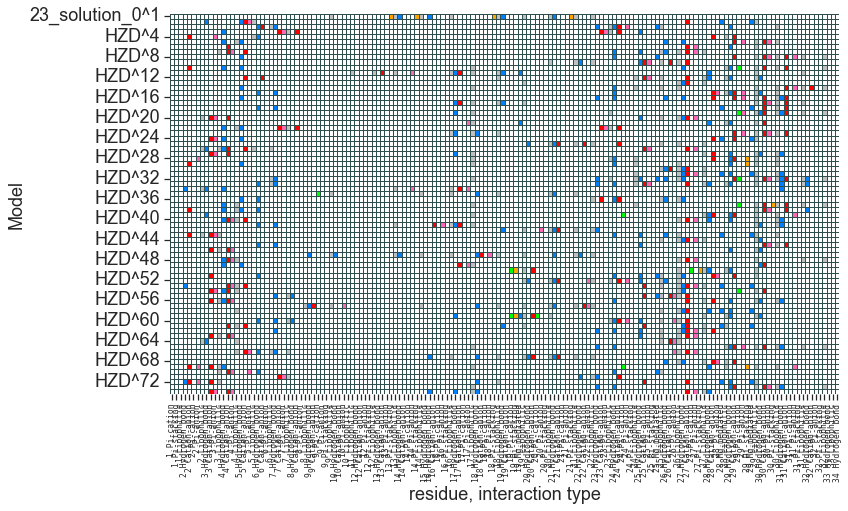

In [44]:
drawFingerprint(df_pz_redockingFPNZColors.head(75), 'full')

We are saving to file puzzle23-fingerprint_selected.png


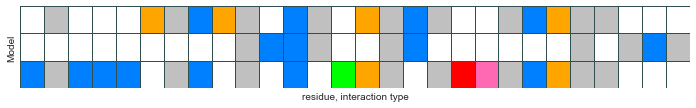

In [45]:
# tylko wskazane molekuły:

df_pz_redockingFPNZColorsSelected = dropZeros(df_pz_redockingFPNZColors.filter(items=['23_solution_0^1', 'HZD^191', 'HZD^212'], axis=0))
#df_pz_redockingFPNZColors.to_csv("temp.csv")

drawFingerprint(df_pz_redockingFPNZColorsSelected, 'full', figsize=(12, 1.5), filename="puzzle23-fingerprint_selected.png", xfontsize=0, yfontsize=0, axSize=10)

   no interaction  HB  CA  Lipophilic  Pi_Stacking  Pi_Cation  Pi_Anion
0               0   1   2           4            5          6         7


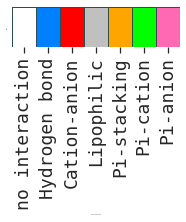

In [46]:
drawLegendSelected(df_pz_redockingFPNZColorsSelected, 'full', "puzzle23-fingerprint_selected-legend.png")

# Similarity Heatmaps 

In [47]:
matrixTanimotoPuzzle = pd.read_csv("puzzle/fingerprints/sim_matrix/fulllength-puzzle-FULL.tsv_tanimoto.tsv", delimiter="\t", index_col=0)
matrixTverskyPuzzle = pd.read_csv("puzzle/fingerprints/sim_matrix/fulllength-puzzle-FULL.tsv_tversky.tsv", delimiter="\t", index_col=0)

# matrixTanimotoRedocking.sort_values(by='solution^1', inplace=True, axis=1)
# matrixTanimotoDocking.sort_values(by='solution^1', inplace=True, axis=1)

# matrixTanimotoRedocking.sort_values(by='solution^1', inplace=True, axis=0)
# matrixTanimotoDocking.sort_values(by='solution^1', inplace=True, axis=0)

In [48]:
matrixTanimotoPuzzle.head(3)

,23_solution_0^1,Bujnicki_01^1,Bujnicki_02^1,Bujnicki_03^1,Chen_01^1,Chen_02^1,Chen_03^1,Das_01^1,Das_02^1,Das_03^1,...,Ding_05^1,Dokholyan_01^1,RNAComposerHuman_01^1,RNAComposerHuman_02^1,RNAComposerHuman_03^1,Xiao_01^1,Xiao_02^1,Xiao_03^1,Xiao_04^1,Xiao_05^1
Ligand_name,,,,,,,,,,,,,,,,,,,,,
23_solution_0^1,1.0000,0.0001,0.0312,0.0690,0.1852,0.2273,0.1786,0.1613,0.1667,0.3571,...,0.1290,0.0001,0.0909,0.0909,0.1304,0.0001,0.0001,0.0001,0.1667,0.0800
Bujnicki_01^1,0.0001,1.0000,0.1250,0.0001,0.0001,0.0001,0.0001,0.0345,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0741,0.1429,0.0455,0.0001,0.1053
Bujnicki_02^1,0.0312,0.1250,1.0000,0.0001,0.0001,0.0001,0.0001,0.0294,0.0303,0.0278,...,0.0303,0.0001,0.0455,0.0455,0.0417,0.1333,0.1600,0.1667,0.0001,0.0833


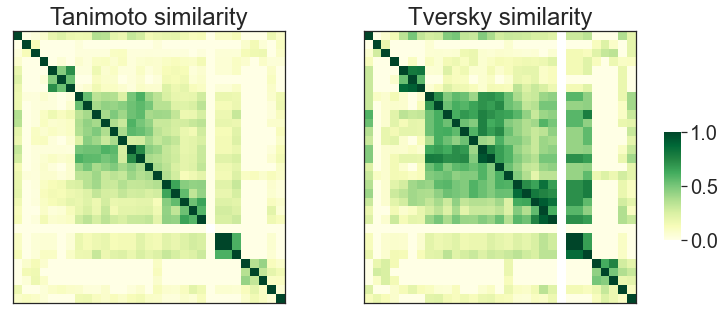

In [49]:
def drawHeatMap(df, ax, cbar=False):
    ax = sns.heatmap(df,
                     linewidths=0,
                     xticklabels=False,
                     yticklabels=False,
                     cbar_ax = cbar_ax, cbar=True,
                     square=True,
                     cmap="YlGn",
                     ax=ax,
                     vmin=0, vmax=1,
                     cbar_kws={"shrink": .82, 'label': 'Tanimoto'}
                    )
    
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 5))
cbar_ax = fig.add_axes([.905, .3, .02, .3])


drawHeatMap(matrixTanimotoPuzzle, ax = axes[0])
drawHeatMap(matrixTverskyPuzzle, ax = axes[1])

axes[0].set_title('Tanimoto similarity')
axes[1].set_title('Tversky similarity')

axes[0].set_ylabel('');
axes[1].set_ylabel('');

cbar_ax.set_ylabel('')

for ax in axes:
    for _, spine in ax.spines.items():
        spine.set_visible(True)

# fig.suptitle('Bigger 1 row x 2 columns axes with no data')

plt.subplots_adjust(wspace=0.1)